In [1]:
import weo as w
import pandas as pd

In [2]:
# If I'm going to use in a python file download like this
w.download(2024, "April", 'csv')

File downloaded successfully!
WEO_2024_April.csv


In [3]:
# If I'm going to use in excel download like this
w.download(2024, "April", 'xls')

File downloaded successfully!
WEO_2024_April.xls


In [4]:
# Read in the file so we can now work with it
df = w.reads_csv("WEO_2024_April.csv")

In [5]:
# Shows the first row of the data, helps us understand what we are dealing with
df.head(1)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2022,2023,2024,2025,2026,2027,2028,2029,Estimates Start After,Unnamed: 60
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,032.711",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0,NaN


In [6]:
# Allows for viewing of variables with the subject code, the description, and then the units
df.variables()

('NGDP_R', 'Gross domestic product, constant prices', 'National currency')
('NGDP_RPCH', 'Gross domestic product, constant prices', 'Percent change')
('NGDP', 'Gross domestic product, current prices', 'National currency')
('NGDPD', 'Gross domestic product, current prices', 'U.S. dollars')
('PPPGDP', 'Gross domestic product, current prices', 'Purchasing power parity; international dollars')
('NGDP_D', 'Gross domestic product, deflator', 'Index')
('NGDPRPC', 'Gross domestic product per capita, constant prices', 'National currency')
('NGDPRPPPPC', 'Gross domestic product per capita, constant prices', 'Purchasing power parity; 2017 international dollar')
('NGDPPC', 'Gross domestic product per capita, current prices', 'National currency')
('NGDPDPC', 'Gross domestic product per capita, current prices', 'U.S. dollars')
('PPPPC', 'Gross domestic product per capita, current prices', 'Purchasing power parity; international dollars')
('NGAP_NPGDP', 'Output gap in percent of potential GDP', 'Perc

In [7]:
df.countries("United")

,WEO Country Code,ISO,Country
8096,466,ARE,United Arab Emirates
8140,112,GBR,United Kingdom
8184,111,USA,United States


In [8]:
# Creates the above shown table into a csv that you can access
df[df['WEO Subject Code'] == 'PCPI'].to_csv("CPI_2024_Data.csv", index=False)

In [9]:
cpi_df = pd.read_csv("CPI_2024_Data.csv")

In [10]:
cpi_df.head(5)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2022,2023,2024,2025,2026,2027,2028,2029,Estimates Start After,Unnamed: 60
0,512,AFG,PCPI,Afghanistan,"Inflation, average consumer prices","Expressed in averages for the year, not end-of...",Index,Units,Source: National Statistics Office Latest actu...,NaN,...,143.822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0,NaN
1,914,ALB,PCPI,Albania,"Inflation, average consumer prices","Expressed in averages for the year, not end-of...",Index,Units,Source: National Statistics Office Latest actu...,NaN,...,118.286,123.927,128.259,132.105,136.011,140.095,144.331,148.659,2022.0,NaN
2,612,DZA,PCPI,Algeria,"Inflation, average consumer prices","Expressed in averages for the year, not end-of...",Index,Units,Source: National Statistics Office Latest actu...,8.975,...,247.425,270.486,290.911,309.388,328.198,346.312,364.425,382.699,2022.0,NaN
3,171,AND,PCPI,Andorra,"Inflation, average consumer prices","Expressed in averages for the year, not end-of...",Index,Units,Source: National Statistics Office Latest actu...,NaN,...,106.202,112.157,116.941,119.795,122.256,124.334,126.448,128.597,2023.0,NaN
4,614,AGO,PCPI,Angola,"Inflation, average consumer prices","Expressed in averages for the year, not end-of...",Index,Units,Source: National Statistics Office Latest actu...,--,...,658.179,747.946,912.523,"1,029.494","1,117.065","1,200.202","1,289.526","1,385.498",2023.0,NaN


In [11]:
# Select the countries we want to view in the graph 
countries = ['United Arab Emirates', 'United Kingdom']
cpi_df = cpi_df[cpi_df['Country'].isin(countries)]

# Prepares the data for the graph
cpi_df = w.transform(cpi_df)

country_list = cpi_df['Country'].unique()
prepared_dfs = w.clean.prep_dfs(cpi_df, 'Country', country_list)

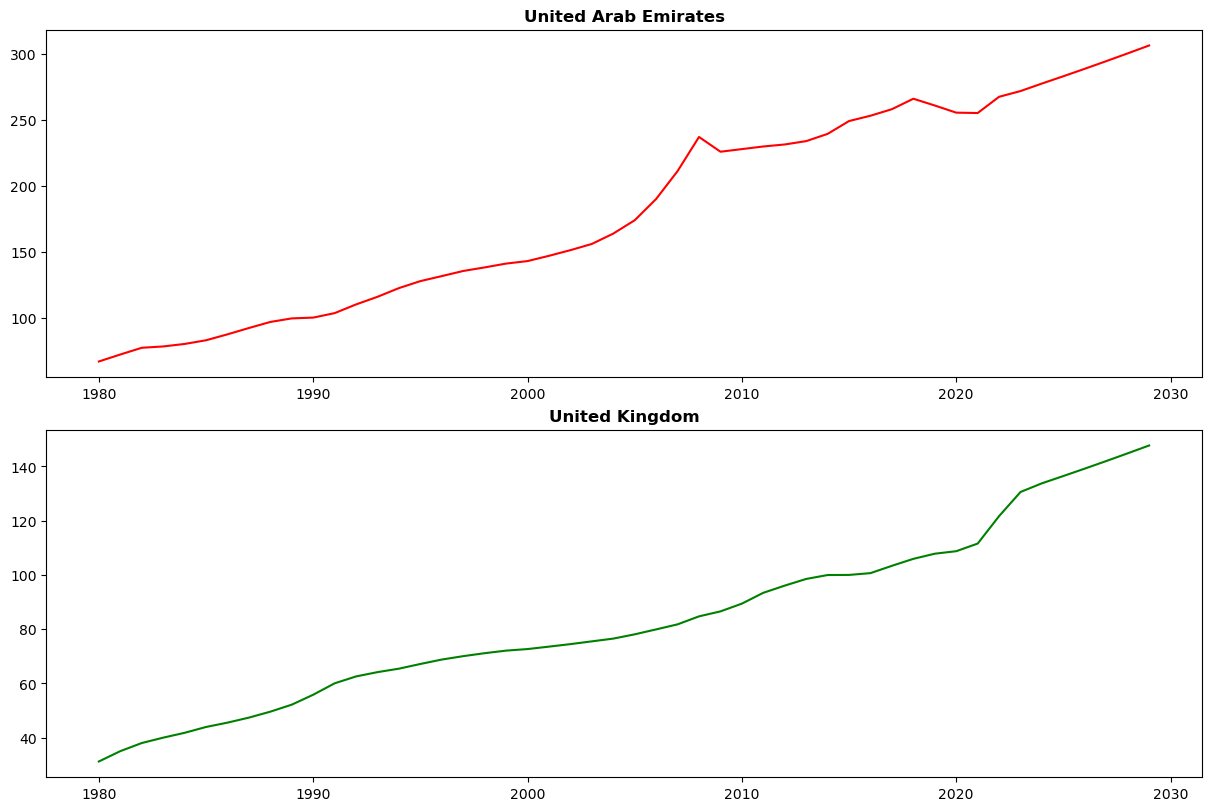

In [12]:
import psf_library.plotting as psf_plot

colors = ['red', 'green', 'blue', 'purple', 'orange']
fig, axes, dfs = psf_plot.plot_colored_lines(country_list, colors, prepared_dfs, 'Value', 'date', 2, 1, (12,8), 'o')

for ax, index in zip(axes, country_list):
    psf_plot.simple_axes(ax, index)